In [89]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

plt.style.use(style="seaborn")
%matplotlib inline

In [90]:
df = pd.read_csv("data/sp500_stocks.csv")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3560 non-null   object 
 1   Symbol     3560 non-null   object 
 2   Adj Close  3560 non-null   float64
 3   Close      3560 non-null   float64
 4   High       3560 non-null   float64
 5   Low        3560 non-null   float64
 6   Open       3560 non-null   float64
 7   Volume     3560 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 222.6+ KB


In [92]:
df.set_index("Date", drop=True, inplace=True)

In [93]:
# We only use the close feature.

In [94]:
df = df[["Close"]]

In [95]:
type(df["Close"]) == type(df[["Close"]])

False

In [96]:
type(df[["Close"]])

pandas.core.frame.DataFrame

In [97]:
df.describe()

,Close
count,3560.000000
mean,61.278958
std,56.666449
min,6.858929
25%,19.799464
50%,32.913750
75%,109.447500
max,198.110001


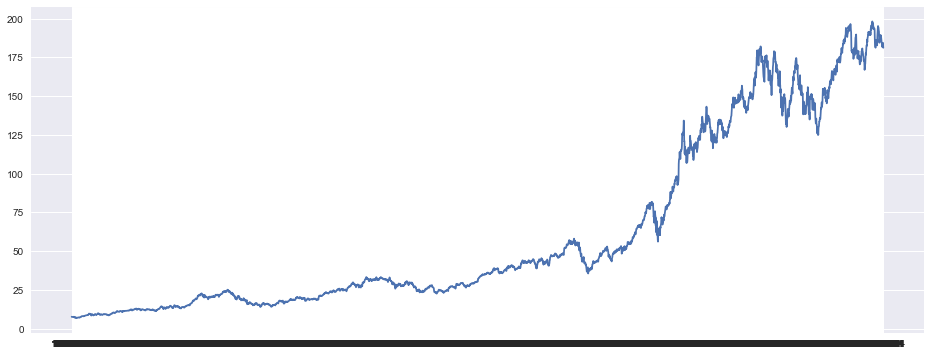

In [98]:
plt.figure(1, figsize=(16, 6))
_ = plt.plot(df.Close)

In [99]:
#Calculate the percentage change for stationarity

In [100]:
df["Returns"] = df.Close.pct_change()

In [101]:
df.head(5)

,Close,Returns
Date,,
1/4/2010,7.643214,NaN
1/5/2010,7.656429,0.001729
1/6/2010,7.534643,-0.015906
1/7/2010,7.520714,-0.001849
1/8/2010,7.570714,0.006648


In [102]:
7.656 / 7.643 - 1

0.001700902786863745

In [103]:
#Calculate log returns.

In [104]:
df["Log_Returns"] = np.log(1 + df["Returns"])

In [105]:
df.head(5)

,Close,Returns,Log_Returns
Date,,,
1/4/2010,7.643214,NaN,NaN
1/5/2010,7.656429,0.001729,0.001727
1/6/2010,7.534643,-0.015906,-0.016034
1/7/2010,7.520714,-0.001849,-0.001850
1/8/2010,7.570714,0.006648,0.006626


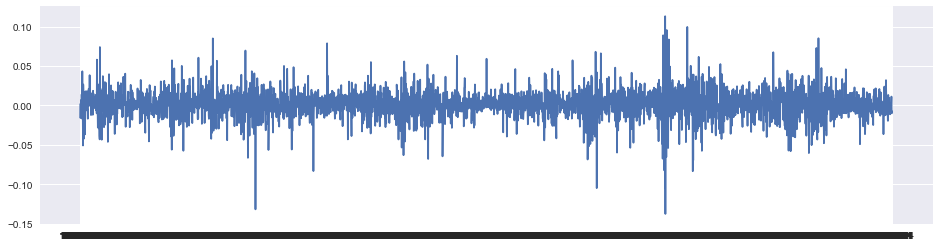

In [106]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.Log_Returns)

In [107]:
df.dropna(inplace=True)
X = df[["Close", "Log_Returns"]].values

In [108]:
X

array([[ 7.65642881e+00,  1.72743786e-03],
       [ 7.53464317e+00, -1.60341878e-02],
       [ 7.52071381e+00, -1.85042055e-03],
       ...,
       [ 1.84369995e+02,  1.11811565e-02],
       [ 1.82520004e+02, -1.00848019e-02],
       [ 1.81160004e+02, -7.47914051e-03]])

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [111]:
X_scaled[:5]

array([[0.00416991, 0.55581765],
       [0.00353313, 0.48501627],
       [0.00346029, 0.54155559],
       [0.00372173, 0.5753456 ],
       [0.00337253, 0.51361156]])

In [112]:
y = [x[0] for x in X_scaled]

In [113]:
y[:5]

[0.004169909485906773,
 0.0035331253880132446,
 0.003460292504542835,
 0.003721729947077125,
 0.0033725300262813576]

In [ ]:
#Train Test Split

In [114]:
split = int(len(X_scaled) * 0.8)
print(split)

2847


In [115]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [116]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [ ]:
#Labeling the Time Series using the Time Step for 3 Days

In [117]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i]) # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i]) #predict next record
    

In [118]:
df.head(5)

,Close,Returns,Log_Returns
Date,,,
1/5/2010,7.656429,0.001729,0.001727
1/6/2010,7.534643,-0.015906,-0.016034
1/7/2010,7.520714,-0.001849,-0.001850
1/8/2010,7.570714,0.006648,0.006626
1/11/2010,7.503929,-0.008821,-0.008861


In [119]:
Xtrain[0]

array([[0.00416991, 0.55581765],
       [0.00353313, 0.48501627],
       [0.00346029, 0.54155559]])

In [120]:
ytrain[0]

0.003721729947077125

In [122]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [123]:
scaler.inverse_transform(val)

array([[ 7.570714  , -0.13770805]])

In [ ]:
#In LSTM Network - input for each layer must contain # of observations, time steps, and features.

In [124]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [125]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(2844, 3, 2)
(2844,)
---
(709, 3, 2)
(709,)


In [ ]:
#LSTM Model

In [127]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [129]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=100, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/100
178/178 [==============================] - 5s 10ms/step - loss: 0.0411 - val_loss: 0.3493
Epoch 2/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0162 - val_loss: 0.2846
Epoch 3/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0122 - val_loss: 0.1984
Epoch 4/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0072 - val_loss: 0.0970
Epoch 5/100
178/178 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0242
Epoch 6/100
178/178 [==============================] - 1s 4ms/step - loss: 4.3733e-04 - val_loss: 0.0059
Epoch 7/100
178/178 [==============================] - 1s 4ms/step - loss: 2.6253e-04 - val_loss: 0.0042
Epoch 8/100
178/178 [==============================] - 1s 4ms/step - loss: 2.2814e-04 - val_loss: 0.0039
Epoch 9/100
178/178 [==============================] - 1s 4ms/step - loss: 1.9962e-04 - val_loss: 0.0037
Epoch 10/100
178/178 [==============================] - 1s 4ms/step - loss

178/178 [==============================] - 1s 4ms/step - loss: 3.1832e-05 - val_loss: 0.0012
Epoch 79/100
178/178 [==============================] - 1s 4ms/step - loss: 3.2923e-05 - val_loss: 0.0013
Epoch 80/100
178/178 [==============================] - 1s 4ms/step - loss: 3.1551e-05 - val_loss: 0.0015
Epoch 81/100
178/178 [==============================] - 1s 4ms/step - loss: 3.2226e-05 - val_loss: 0.0014
Epoch 82/100
178/178 [==============================] - 1s 4ms/step - loss: 3.2716e-05 - val_loss: 0.0013
Epoch 83/100
178/178 [==============================] - 1s 4ms/step - loss: 3.2058e-05 - val_loss: 0.0015
Epoch 84/100
178/178 [==============================] - 1s 4ms/step - loss: 3.1245e-05 - val_loss: 0.0016
Epoch 85/100
178/178 [==============================] - 1s 4ms/step - loss: 3.1528e-05 - val_loss: 0.0010
Epoch 86/100
178/178 [==============================] - 1s 4ms/step - loss: 3.1817e-05 - val_loss: 0.0018
Epoch 87/100
178/178 [==============================] - 1s 

In [130]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 112       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [131]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)

23/23 [==============================] - 0s 2ms/step


In [133]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [ ]:
#invert predictions

In [134]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

In [135]:
print(trainPredict[:5])
print(testPredict[:5])

[7.4245144016573015, 7.518787871155078, 7.343217783530689, 7.269560223293702, 7.474525223286133]
[132.43909034839663, 133.4270238712533, 128.8908170678447, 129.70572970556992, 129.90211946766274]


In [136]:
from sklearn.metrics import mean_squared_error

In [137]:
# calculate root mean squared error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 46.46 RMSE
Test Score: 157.00 RMSE
